#### Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Attribute Information:
<ol>
    <li> Age: age of the patient [years] </li>
    <li> Sex: sex of the patient [M: Male, F: Female] </li>
    <li> ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] </li>
    <li> RestingBP: resting blood pressure [mm Hg] </li>
    <li> Cholesterol: serum cholesterol [mm/dl] </li>
    <li> FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] </li>
    <li> RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST  elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] </li>
    <li> MaxHR: maximum heart rate achieved [Numeric value between 60 and 202] </li>
    <li> ExerciseAngina: exercise-induced angina [Y: Yes, N: No] </li>
    <li> Oldpeak: oldpeak = ST [Numeric value measured in depression] </li>
    <li> ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] </li>
    <li> HeartDisease: output class [1: heart disease, 0: Normal] </li>
</ol>

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 90)
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Arial'
pd.set_option('display.max_colwidth', None)


file_path = './heart.csv'
heart_data = pd.read_csv(file_path)

heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [69]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### Checking for null and data types

In [70]:
null_summary = heart_data.isnull().sum()

numerical_summary = heart_data.describe()

categorical_columns = heart_data.select_dtypes(include='object').columns
categorical_summary = {col: heart_data[col].unique() for col in categorical_columns}

null_summary, numerical_summary, categorical_summary

(Age               0
 Sex               0
 ChestPainType     0
 RestingBP         0
 Cholesterol       0
 FastingBS         0
 RestingECG        0
 MaxHR             0
 ExerciseAngina    0
 Oldpeak           0
 ST_Slope          0
 HeartDisease      0
 dtype: int64,
               Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
 count  918.000000  918.000000   918.000000  918.000000  918.000000   
 mean    53.510893  132.396514   198.799564    0.233115  136.809368   
 std      9.432617   18.514154   109.384145    0.423046   25.460334   
 min     28.000000    0.000000     0.000000    0.000000   60.000000   
 25%     47.000000  120.000000   173.250000    0.000000  120.000000   
 50%     54.000000  130.000000   223.000000    0.000000  138.000000   
 75%     60.000000  140.000000   267.000000    0.000000  156.000000   
 max     77.000000  200.000000   603.000000    1.000000  202.000000   
 
           Oldpeak  HeartDisease  
 count  918.000000    918.000000  
 mean     0.887364    

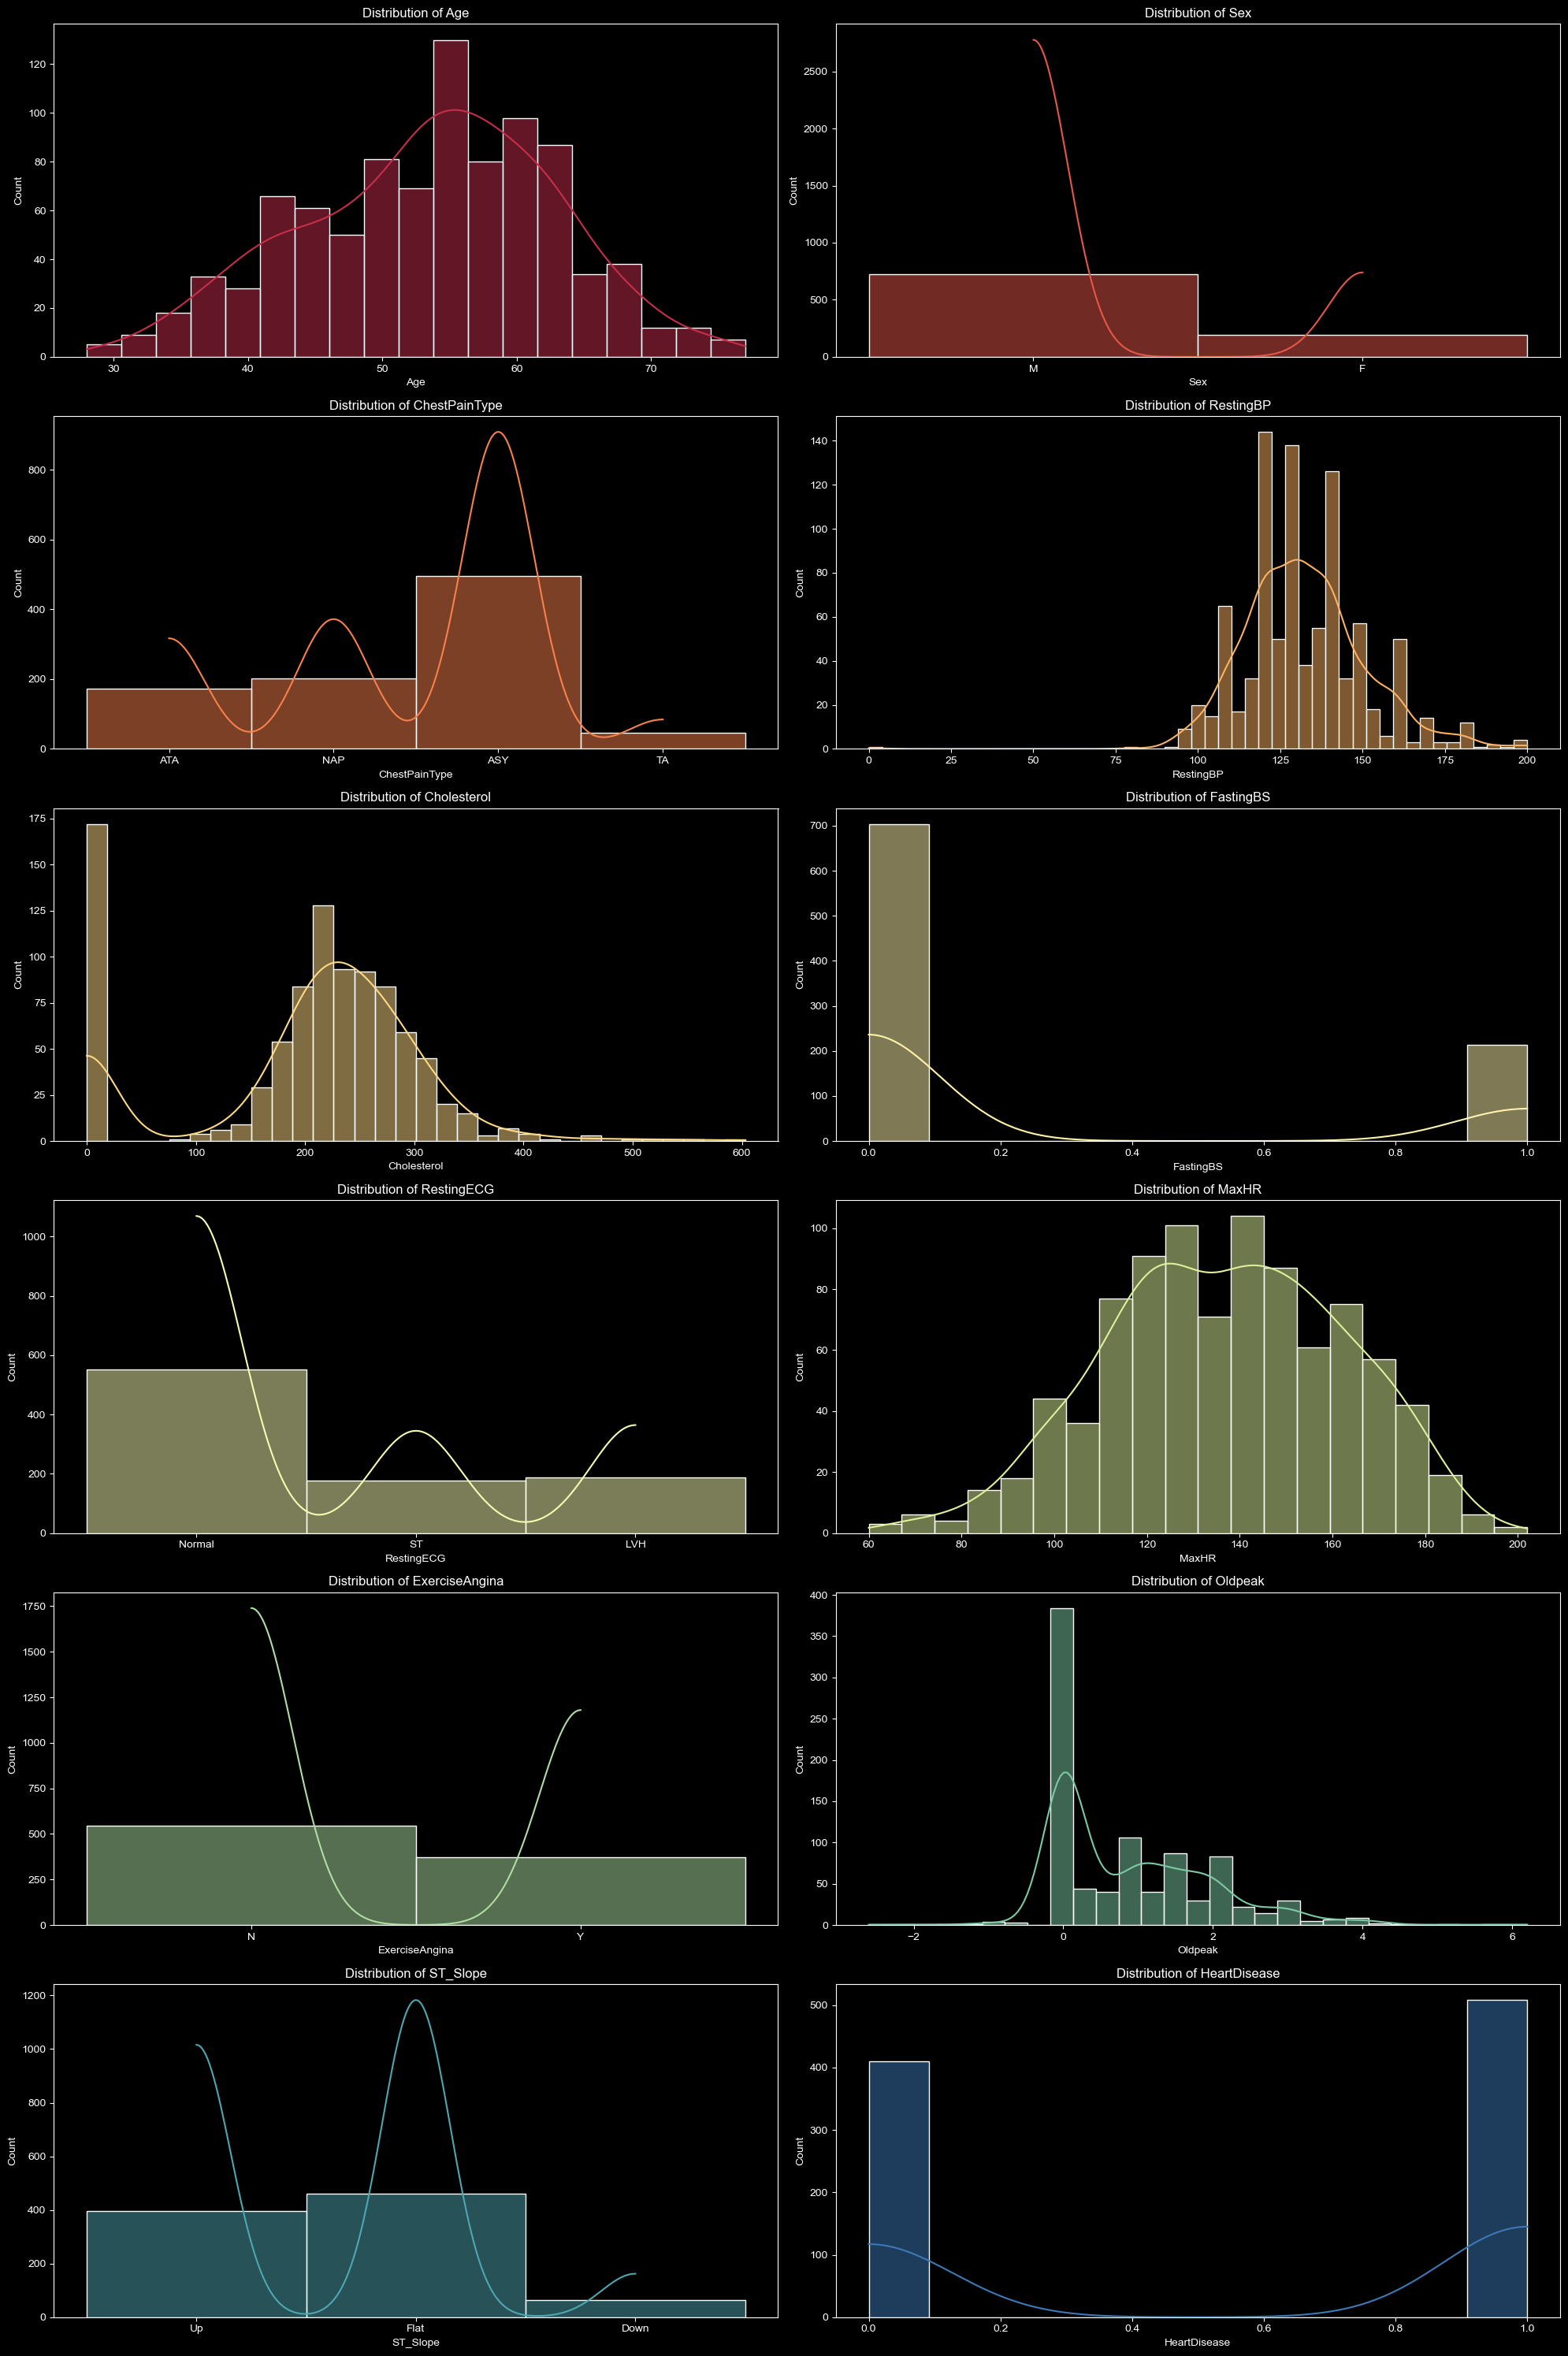

In [71]:
colors = sns.color_palette("Spectral", n_colors=len(heart_data.columns))

cols_per_row = 2
num_rows = len(heart_data.columns) // cols_per_row + (len(heart_data.columns) % cols_per_row > 0)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, num_rows * 5))

for i, col in enumerate(heart_data.columns):
    row = i // cols_per_row
    col_idx = i % cols_per_row
    
    sns.histplot(heart_data[col], kde=True, ax=axes[row, col_idx], color=colors[i])
    
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

#### Preprocessing

In [72]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
binary_features = ['FastingBS']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

processed_data = preprocessor.fit_transform(heart_data)

processed_feature_names = (
    numerical_features +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)) +
    binary_features +
    ['HeartDisease']
)
processed_df = pd.DataFrame(processed_data, columns=processed_feature_names)
processed_df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,FastingBS,HeartDisease
0,0.244898,0.70,0.479270,0.788732,0.295455,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.428571,0.80,0.298507,0.676056,0.409091,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.183673,0.65,0.469320,0.267606,0.295455,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.408163,0.69,0.354892,0.338028,0.465909,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.530612,0.75,0.323383,0.436620,0.295455,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Correlations

<Axes: >

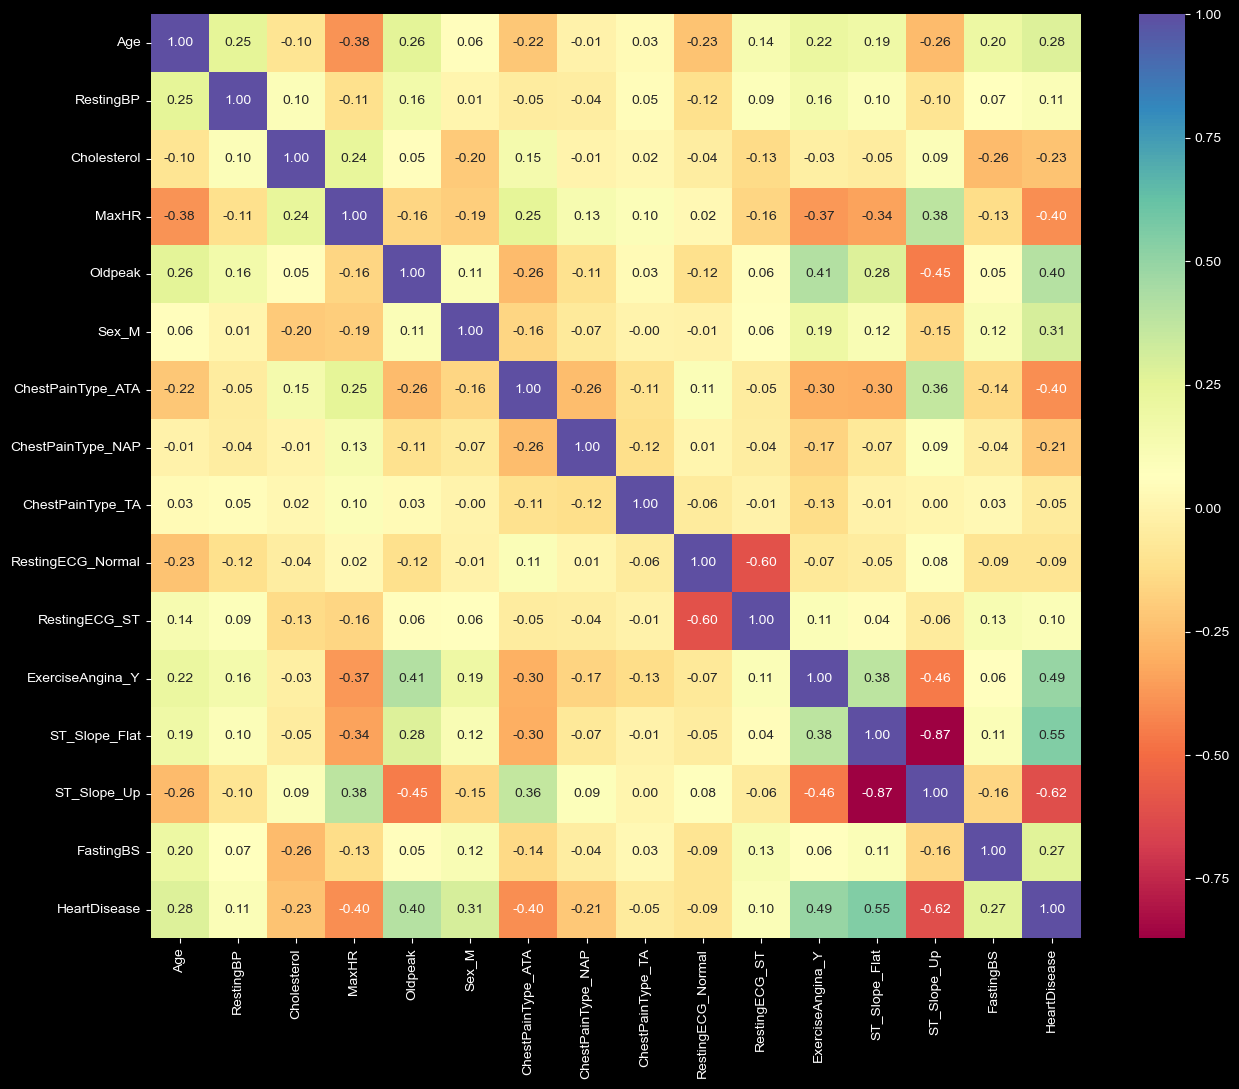

In [73]:
correlation_matrix = processed_df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Spectral')

#### Split the data

In [74]:
from sklearn.model_selection import train_test_split

X = processed_df.drop(columns=['HeartDisease'])
y = processed_df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((734, 15), (184, 15), (734,), (184,))

#### Metrics
- **Accuracy**: The percentage of correct predictions out of all predictions.
- **Precision**: Out of the times the model predicted heart diseas, how often was it correct? (High precision means fewer false alarms.)
- **Recall**: Out of the actual heart disease cases, how many did the model correctly identify? (High recall means fewer missed cases of heart disease.)
- **F1-Score**: Combination of precision and recall.

The most important metric for this dataset is propably **Accuracy**.

#### Train Decision Tree

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75        82
         1.0       0.79      0.83      0.81       102

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.78      0.78      0.78       184



<Axes: >

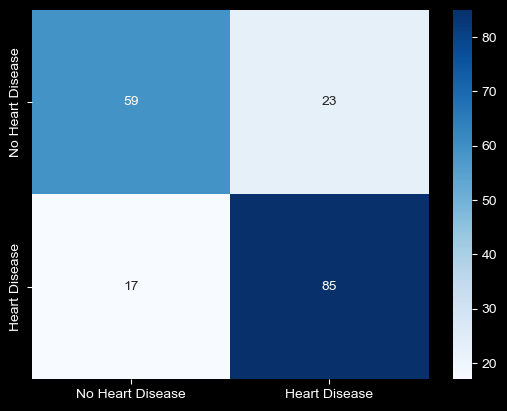

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

class_names = ['No Heart Disease', 'Heart Disease']

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

dt_classification_report = classification_report(y_test, y_pred_dt, output_dict=False)

print("Decision Tree Classification Report:")
print(dt_classification_report)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap="Blues", xticklabels=class_names,
            yticklabels=class_names, fmt='d')

In [76]:
# from sklearn import tree
# plt.figure(figsize=(40,40))
# tree.plot_tree(
#     dt_model,
#     feature_names=X.columns,
#     class_names=['No Heart Disease', 'Heart Disease'],
#     filled=True,
#     rounded=True,
#     fontsize=10
# )
# plt.title("Decision Tree Visualization", fontsize=16)
# plt.show()

#### Train Random Forest

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88        82
         1.0       0.90      0.91      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184



<Axes: >

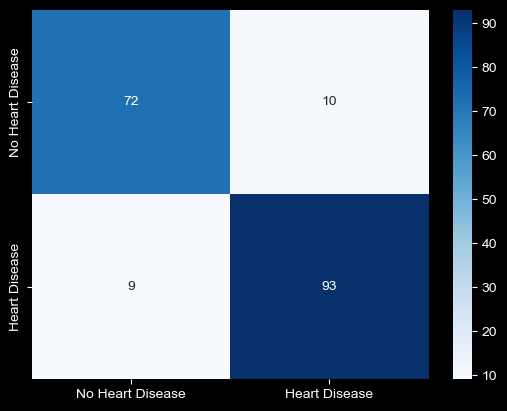

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rf_classification_report = classification_report(y_test, y_pred_rf, output_dict=False)

print("Random Forest Classification Report:")
print(rf_classification_report)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Blues", xticklabels=class_names,
            yticklabels=class_names, fmt='d')

#### Train Logistic Regression

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87        82
         1.0       0.88      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



<Axes: >

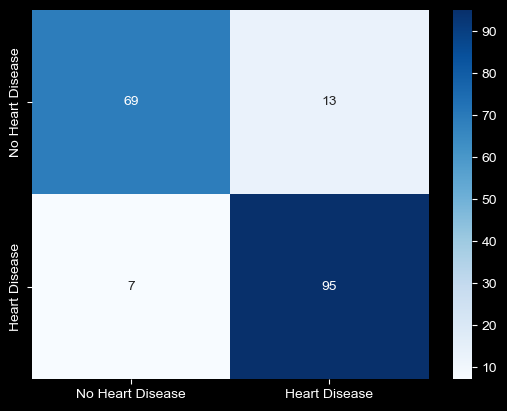

In [78]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, max_iter=1000)

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

lr_classification_report = classification_report(y_test, y_pred_lr, output_dict=False)

print("Logistic Regression Classification Report:")
print(lr_classification_report)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap="Blues", xticklabels=class_names,
            yticklabels=class_names, fmt='d')

#### k-Fold cross validation

In [79]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

number_of_splits = 5

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

stratified_kfold = StratifiedKFold(n_splits=number_of_splits, shuffle=True, random_state=42)

cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')
    cv_results[name] = {
        "Mean Accuracy": scores.mean(),
        "Std Dev": scores.std()
    }

cv_results_df = pd.DataFrame(cv_results).T
cv_results_df

,Mean Accuracy,Std Dev
Decision Tree,0.772292,0.038667
Random Forest,0.864909,0.024728
Logistic Regression,0.863833,0.019501


#### Hyperpparameter tuning

##### Decision Tree
- max_depth: How deep the tree can go. A deeper tree might overfit and perform poorly on new data.
- min_samples_split: The minimum number of samples needed to split a node.

In [ ]:
from sklearn.model_selection import GridSearchCV

dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

dt_model = DecisionTreeClassifier(random_state=42)

dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=number_of_splits, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(X, y)

dt_best_params = dt_grid_search.best_params_
dt_best_score = dt_grid_search.best_score_

print("Best Parameters for Decision Tree:", dt_best_params)
print("Best Cross-Validation Accuracy:", dt_best_score)

dt_results = pd.DataFrame(dt_grid_search.cv_results_)[['param_max_depth', 'param_min_samples_split', 'mean_test_score']]
dt_results

Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.797255880256593


,param_max_depth,param_min_samples_split,mean_test_score
0,3,2,0.797256
1,3,5,0.797256
2,3,10,0.797256
3,5,2,0.776574
4,5,5,0.776574
5,5,10,0.776574
6,10,2,0.738435
7,10,5,0.740651
8,10,10,0.746080
9,None,2,0.706854


##### Random Forest
- n_estimators: The number of trees in the forest.
- max_features: The number of features considered when looking for the best split.

In [81]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 5, 10, None]
}

rf_model = RandomForestClassifier(random_state=42)

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=number_of_splits, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X, y)

rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

print("Best Parameters for Random Forest:", rf_best_params)
print("Best Cross-Validation Accuracy:", rf_best_score)

rf_results = pd.DataFrame(rf_grid_search.cv_results_)[['param_n_estimators', 'param_max_features', 'param_max_depth', 'mean_test_score']]
rf_results

Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.8300190068899976


,param_n_estimators,param_max_features,param_max_depth,mean_test_score
0,50,sqrt,3,0.827750
1,100,sqrt,3,0.824477
2,200,sqrt,3,0.825564
3,50,log2,3,0.827750
4,100,log2,3,0.824477
5,200,log2,3,0.825564
6,50,None,3,0.800552
7,100,None,3,0.805987
8,200,None,3,0.802720
9,50,sqrt,5,0.821246


##### Logistic Regression
- C: A regularization parameter that controls how much the model avoids overfitting.
- solver: The algorithm used to optimize the model.

In [82]:
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

lr_model = LogisticRegression(random_state=42, max_iter=1000)

lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_param_grid, cv=number_of_splits, scoring='accuracy', n_jobs=-1)
lr_grid_search.fit(X, y)

lr_best_params = lr_grid_search.best_params_
lr_best_score = lr_grid_search.best_score_

print("Best Parameters for Logistic Regression:", lr_best_params)
print("Best Cross-Validation Accuracy:", lr_best_score)

lr_results = pd.DataFrame(lr_grid_search.cv_results_)[['param_C', 'param_solver', 'mean_test_score']]
lr_results

Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8354122119268235


,param_C,param_solver,mean_test_score
0,0.01,liblinear,0.827720
1,0.01,lbfgs,0.826627
2,0.10,liblinear,0.835412
3,0.10,lbfgs,0.832145
4,1.00,liblinear,0.828914
5,1.00,lbfgs,0.830001
6,10.00,liblinear,0.827845
7,10.00,lbfgs,0.827845
8,100.00,liblinear,0.826758
9,100.00,lbfgs,0.826758


In [83]:
results_table = pd.DataFrame([
    ["Decision Tree", f"{dt_best_params}", dt_best_score],
    ["Random Forest", f"{rf_best_params}", rf_best_score],
    ["Logistic Regression", f"{lr_best_params}", lr_best_score]
], columns=["Algorithm", "Parameters", "Metrics Score"])

results_table.to_csv('model_comparison_results.csv', index=False)
print("\nModel comparison results saved to 'model_comparison_results.csv'")
results_table


Model comparison results saved to 'model_comparison_results.csv'


,Algorithm,Parameters,Metrics Score
0,Decision Tree,"{'max_depth': 3, 'min_samples_split': 2}",0.797256
1,Random Forest,"{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}",0.830019
2,Logistic Regression,"{'C': 0.1, 'solver': 'liblinear'}",0.835412
